In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import pandas as pd
import omicverse as ov

attn_adata = sc.read("result_pancancer.h5ad")
sub = attn_adata[attn_adata.obs['major type']=='cDC',:]

print(sub)

sc.tl.pca(sub, svd_solver='arpack')

View of AnnData object with n_obs × n_vars = 14908 × 299
    obs: 'Prediction', 'cell type', 'cancer', 'major type', 'tissue'
    uns: 'cell type_colors', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'


AnnData object with n_obs × n_vars = 14908 × 299
    obs: 'Prediction', 'cell type', 'cancer', 'major type', 'tissue'
    uns: 'cell type_colors', 'neighbors', 'umap', 'pca'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


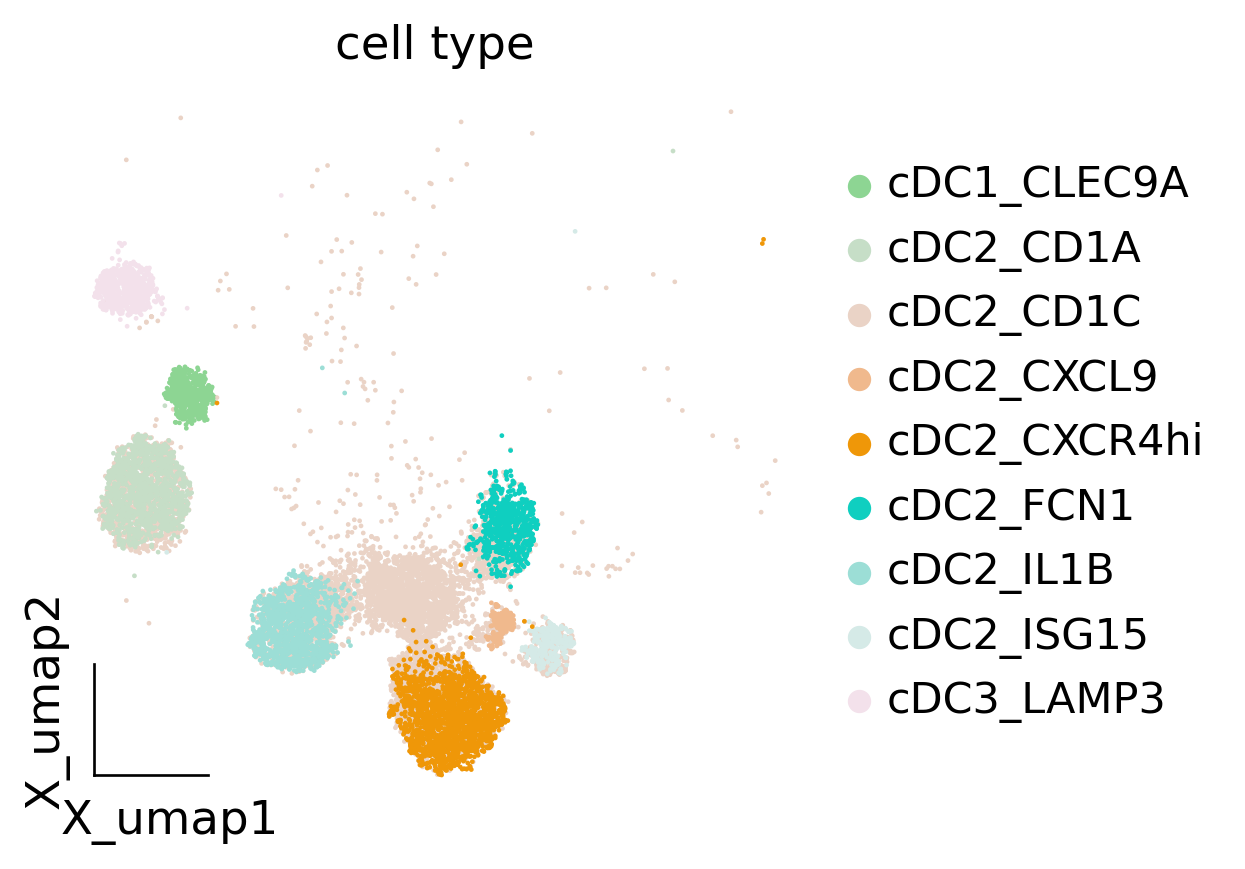

In [3]:
print(sub)
ov.pl.embedding(sub,basis='X_umap',
                   color=['cell type'],
                   frameon='small',cmap='Reds', wspace=0.45)

In [5]:
sub.obs['clusters'] = sub.obs['cell type']
Traj=ov.single.TrajInfer(sub, basis='X_umap',use_rep='X_pca',n_comps=30)
Traj.set_origin_cells('cDC3_LAMP3')
Traj.inference(method='diffusion_map')

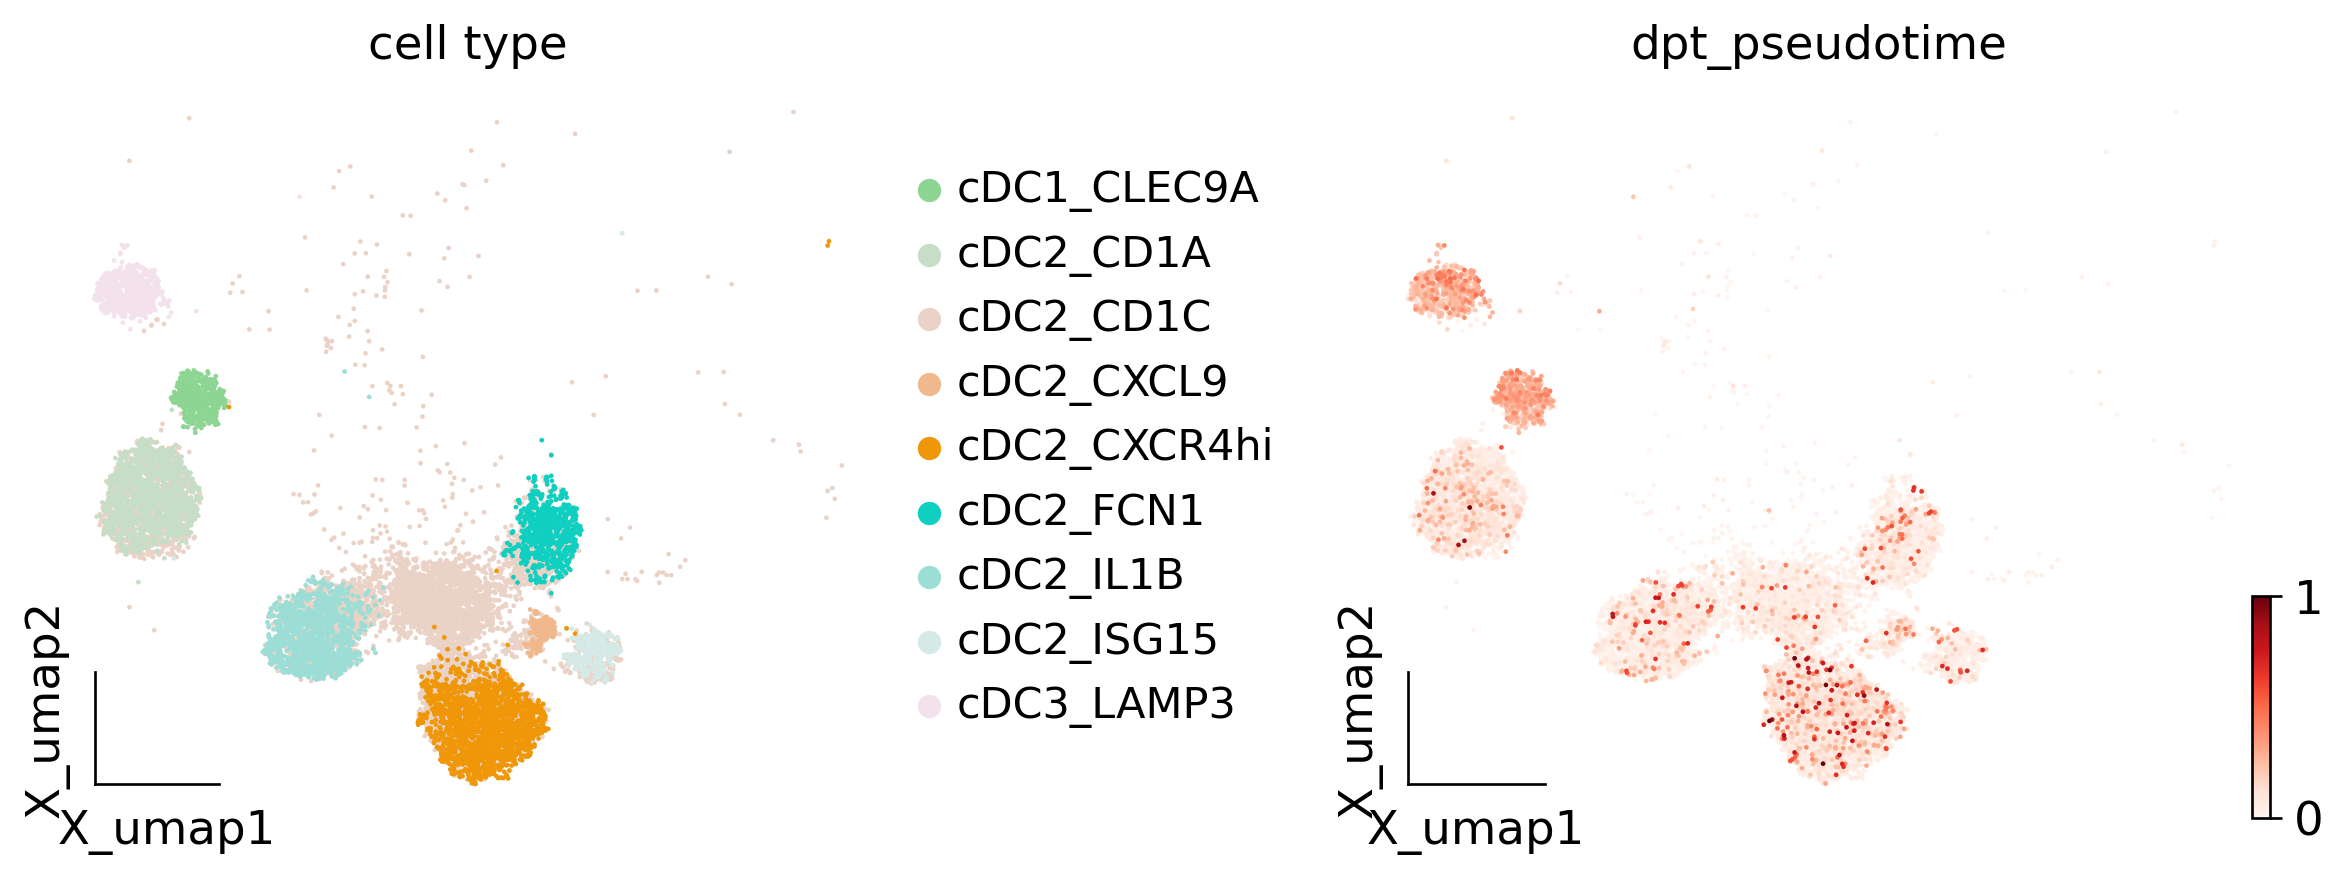

In [6]:
import numpy as np
sub.obs['dpt_pseudotime']=sub.obs['dpt_pseudotime'].fillna(0)
sub.obs['dpt_pseudotime'].replace([np.inf], 1, inplace=True)
sub.obs['dpt_pseudotime'].replace([-np.inf], 0, inplace=True)

ov.pl.embedding(sub,basis='X_umap',
                   color=['cell type','dpt_pseudotime'],
                   frameon='small',cmap='Reds', wspace=0.45)

running PAGA using priors: ['dpt_pseudotime']
    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


<AxesSubplot: title={'center': 'PAGA LTNN-graph'}>

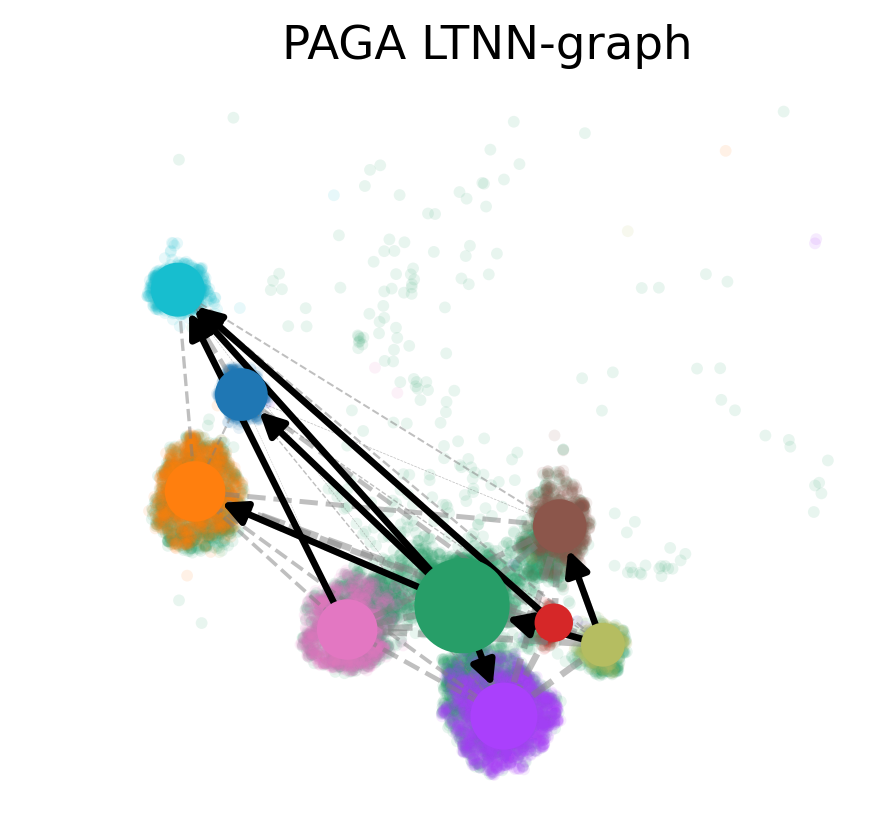

In [7]:
ov.utils.cal_paga(sub,use_time_prior='dpt_pseudotime',vkey='paga',
                 groups='clusters')
ov.utils.plot_paga(sub,basis='umap', size=50, alpha=.1,title='PAGA LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)

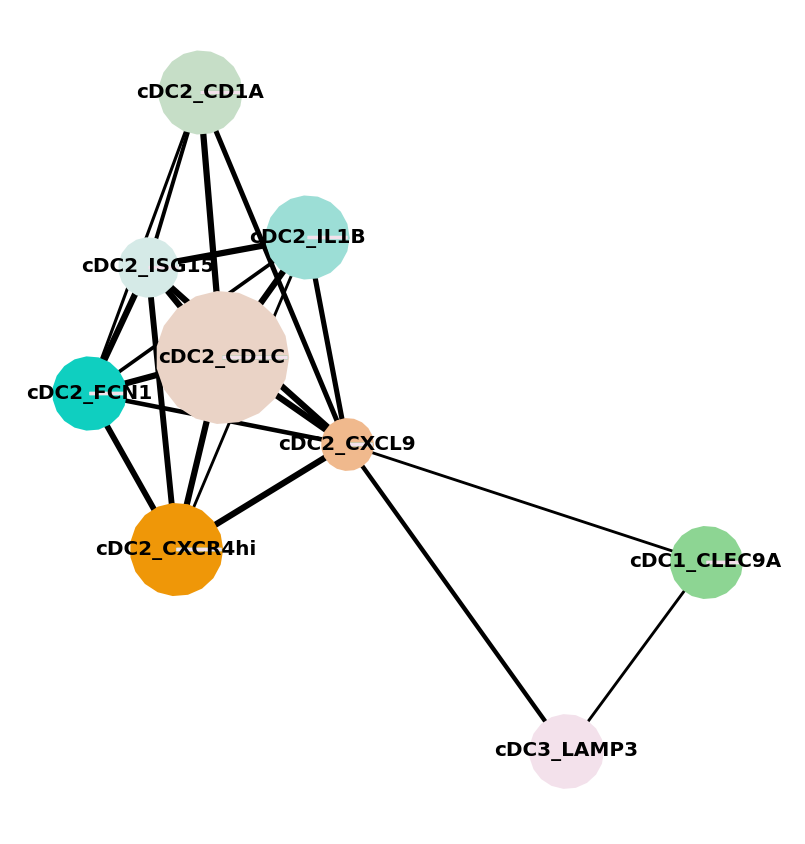

In [8]:
sc.pl.paga(sub, color=['cell type'], frameon=False, fontsize=6, edge_width_scale=0.25, threshold=0.4, node_size_scale=3)